# Netfilx Data Visualization

## Loading the dataset

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from termcolor import colored

In [15]:
df = pd.read_csv("../datasets/netflix_titles.csv")
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [19]:
print(colored("There are {} rows and {} columns in the dataset.".format(df.shape[0],df.shape[1]),attrs=['bold']))

There are 7787 rows and 11 columns in the dataset.


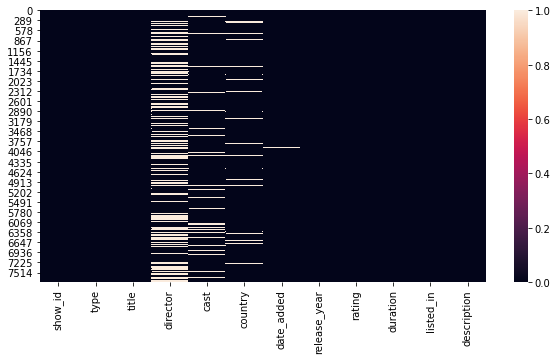

director's null rate : 30.68%
cast's null rate : 9.22%
country's null rate : 6.51%
date_added's null rate : 0.13%
rating's null rate : 0.09%


In [17]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())
plt.show()

for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    if null_rate > 0:
        print("{}'s null rate : {}%".format(i,round(null_rate,2)))

## Handling missing values

In [18]:
# drop director since they have high volume of missing values
df.drop(['director'],axis=1, inplace = True)
df.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [20]:
df.dropna(inplace = True)
print(colored("There are {} rows and {} columns after handling the missing records in the datasets.".format(df.shape[0],df.shape[1]),attrs=['bold']))

There are 6643 rows and 11 columns after handling the missing records in the datasets.


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6643 entries, 0 to 7785
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6643 non-null   object
 1   type          6643 non-null   object
 2   title         6643 non-null   object
 3   cast          6643 non-null   object
 4   country       6643 non-null   object
 5   date_added    6643 non-null   object
 6   release_year  6643 non-null   int64 
 7   rating        6643 non-null   object
 8   duration      6643 non-null   object
 9   listed_in     6643 non-null   object
 10  description   6643 non-null   object
dtypes: int64(1), object(10)
memory usage: 622.8+ KB


In [22]:
df.head(3)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


## Content type on Netlix

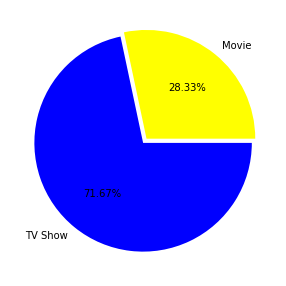

In [43]:
plt.figure(figsize=(10,5))
plt.pie(df['type'].value_counts().sort_values(),
        labels=df['type'].value_counts().index,explode=[0.05,0],
       autopct='%1.2f%%',
       colors=['Yellow','Blue'])
plt.show()

In [45]:
from collections import Counter
country_data = df['country']
country_count = pd.Series(dict(
    Counter(','.join(country_data).replace(
        ' ,',',').replace(
        ', ',',').split(',')))).sort_values(ascending=False)

In [46]:
top20country = country_count.head(20)

c:\users\jdhyeok\desktop\basketball\data-science-starter\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


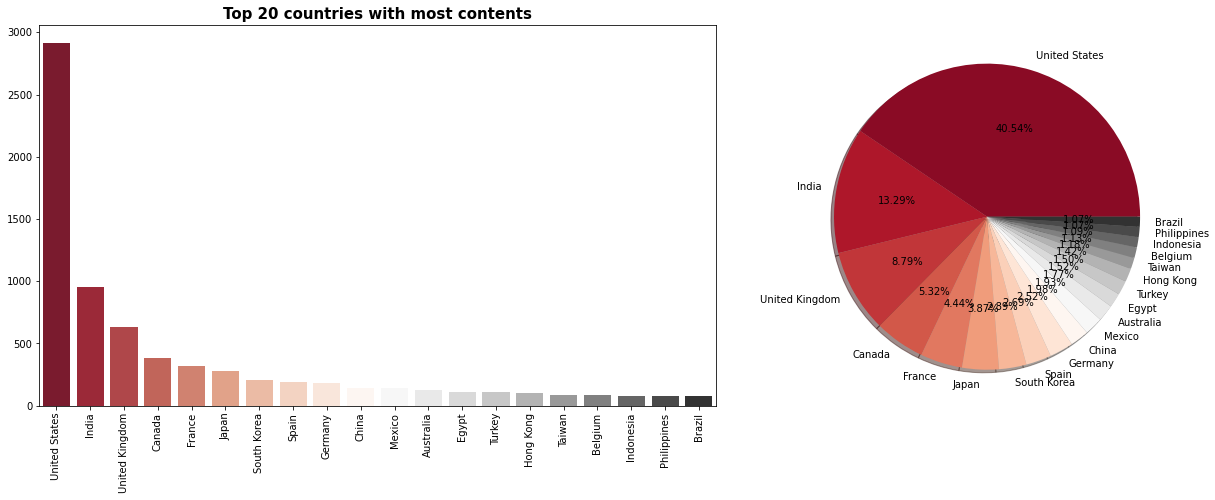

In [50]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 7))
gs = gridspec.GridSpec(nrows=1, ncols=2, height_ratios=[6], width_ratios=[10, 5])

ax = plt.subplot(gs[0])
sns.barplot(top20country.index, top20country, ax=ax, palette="RdGy")
ax.set_xticklabels(top20country.index, rotation='90')
ax.set_title('Top 20 countries with most contents', fontsize=15, fontweight='bold')

ax2 = plt.subplot(gs[1])
ax2.pie(top20country, labels=top20country.index, shadow=True, startangle=0, colors=sns.color_palette("RdGy", n_colors=20),
       autopct='%1.2f%%')
ax2.axis('equal') 

plt.show()

In [56]:
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]